In [1]:
# 빅데이터 저장 ppt 45p
! pip install image

In [2]:
! pip install pillow

In [3]:
from pymongo import MongoClient

In [5]:
db = MongoClient().python_test
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'python_test')

In [7]:
# db : MongoDB
# fs.files : table명
# find() : 전체를 조회
# 이미지 파일이 들어있음을 확인할 수 있다. 인덱스[2]
list(db.fs.files.find())

[{'_id': ObjectId('608f5c6a54d549d2d7aff698'),
  'filename': 'test.txt',
  'md5': '0b97c2704cfb0e1892bb47a0b62bef96',
  'chunkSize': 261120,
  'length': 35,
  'uploadDate': datetime.datetime(2021, 5, 3, 2, 14, 2, 318000)},
 {'_id': ObjectId('608f5d3c54d549d2d7aff69a'),
  'filename': 'test.txt',
  'md5': '0b97c2704cfb0e1892bb47a0b62bef96',
  'chunkSize': 261120,
  'length': 35,
  'uploadDate': datetime.datetime(2021, 5, 3, 2, 17, 32, 750000)},
 {'_id': ObjectId('608f7f7289ae89cd74ab8895'),
  'filename': 'maxresdefault.jpg',
  'metadata': {'contentType': 'image/jpg'},
  'chunkSize': 261120,
  'md5': 'a821bf53b4d0cbce60f3fd37a14fbb49',
  'length': 81966,
  'uploadDate': datetime.datetime(2021, 5, 3, 4, 44, 51, 232000)}]

In [8]:
# 이미지 파일의 정보만 확인하기
# 확인해보니 딕셔너리로 구성되어있음을 확인할 수 있다.
db.fs.files.find()[2]

{'_id': ObjectId('608f7f7289ae89cd74ab8895'),
 'filename': 'maxresdefault.jpg',
 'metadata': {'contentType': 'image/jpg'},
 'chunkSize': 261120,
 'md5': 'a821bf53b4d0cbce60f3fd37a14fbb49',
 'length': 81966,
 'uploadDate': datetime.datetime(2021, 5, 3, 4, 44, 51, 232000)}

In [9]:
# 파일명만 조회하기
db.fs.files.find()[2]['filename']

'maxresdefault.jpg'

In [10]:
from gridfs import GridFS

In [11]:
fs = GridFS(db)

In [13]:
# 파일을 여러번 업로드할 수 있음으로 가장 마지막에 업로드한 파일의 내용을 가져올 객체를 생성
f = fs.get_last_version(filename = db.fs.files.find()[2]['filename'])

In [14]:
# 가장 마지막에 업로드한 파일의 내용을 읽어온다.
data = f.read()

In [15]:
data

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x05\x03\x04\x07\x07\x07\x07\x07\x07\x07\x07\x07\x07\x07\x06\x07\x07\x07\x07\x07\x07\x07\x07\x07\x07\x07\x07\x07\x08\x07\x07\x07\x07\x07\x07\n\x10\x0b\x07\x08\x0e\t\x05\x05\r!\r\x0e\x11\x1d\x1f\x1f\x1f\x07\x0b"$"\x1e$\x10\x1e\x1f\x12\x01\x05\x05\x05\x08\x07\x08\r\t\t\r\x12\r\r\r\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x12\x1e\x12\x12\xff\xc0\x00\x11\x08\x02\xd0\x05\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1d\x00\x00\x01\x05\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x04\x05\x06\x03\x07\x08\t\xff\xc4\x00a\x10\x00\x02\x01\x03\x02\x04\x02\x05\x05\x08\x0e\x06\x06\x06\t\x05\x00\x02\x03\x01\x04\x12\x05"\x06\x11\x132BR\x07#3br\x08\x14!\x82\x921Csu\xa1\xa2\xb2\xb3\x15456AQSacqt\x81\xb4\xc2$\x83\x91\x93\xb1\xd2\x16&D\xa3\xc3\xc4%d\

In [16]:
# image를 import하기
from PIL import Image

In [17]:
from io import BytesIO

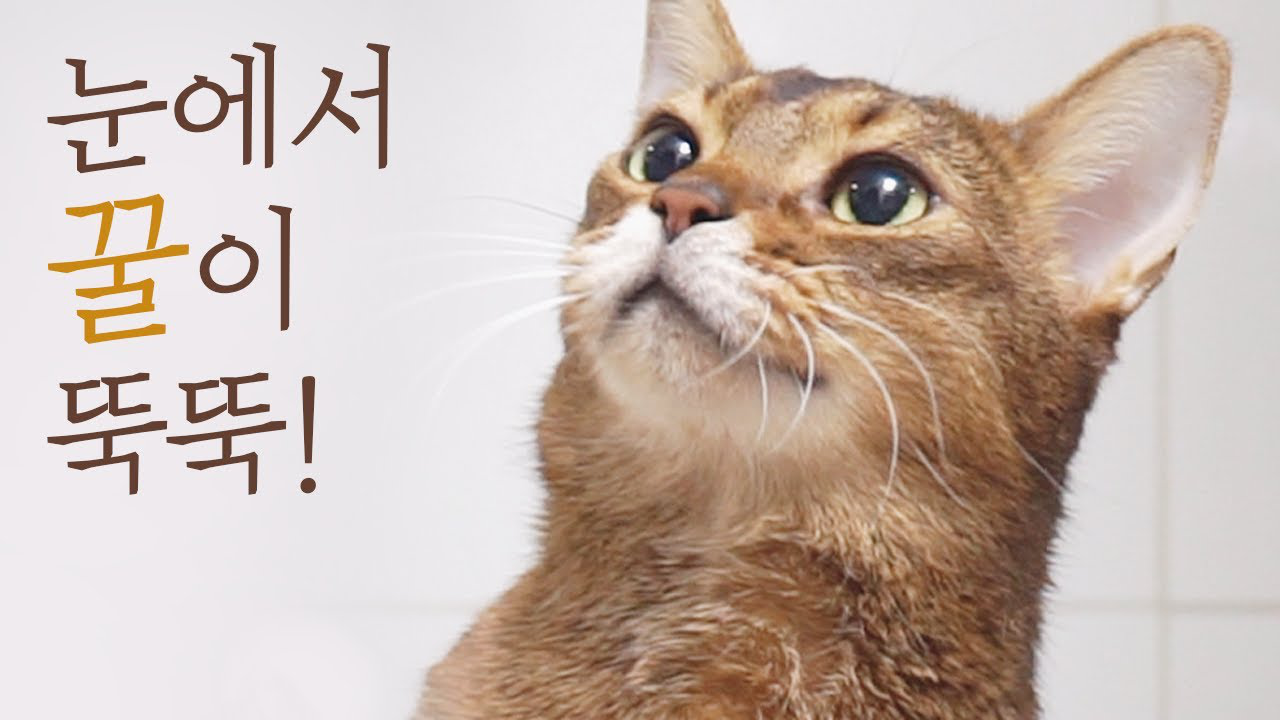

In [18]:
# 이미지가 화면에 그려진다.
# 1) data : 이미지 내용을 가지고 있다.
# 2) BytesIO(data) : data에 있는 이미지 내용을 읽어들인다.
# 3) Image.open : BytesIO가 읽은 내용을 화면에 출력한다.
Image.open(BytesIO(data))